# Ridge Regression using mini-BGD algorithm

In [15]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

In [9]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
# download the file
try:
	import urllib.request
	data = urllib.request.urlopen(url)
except ImportError:
	import urllib
	data = urllib.urlopen(url)

In [12]:
data

In [13]:
data = pd.read_csv(url, sep=";")
data = (data - data.mean()) /data.std()

In [14]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594,-0.787576
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594,-0.787576
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594,0.450707
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576


In [13]:
data_train = data.sample(frac=0.8, random_state=1)
data_test = data.drop(data_train.index)
data_train.reset_index(drop=True,inplace=True)
data_test.reset_index(drop=True,inplace=True)

In [14]:
data_train_X = data_train.drop(["quality"], axis=1)
data_train_Y = data_train[["quality"]]

In [15]:
data_test_X = data_test.drop(["quality"], axis=1)
data_test_Y =data_test[["quality"]]

In [16]:
data_train_X = data_train_X.as_matrix()
data_train_X = np.hstack((np.ones((len(data_train_X),1)),data_train_X))
data_train_Y = data_train_Y.as_matrix()
data_train_Y = np.array(data_train_Y).flatten()

### Seperating X and Y in Test Datasets

In [17]:
data_test_X = data_test_X.as_matrix()
data_test_X = np.hstack((np.ones((len(data_test_X),1)),data_test_X))
data_test_Y = data_test_Y.as_matrix()
data_test_Y = np.array(data_test_Y).flatten()

### Mini Batch Gradient Descent 

Batch gradient descent is a variation of the gradient descent algorithm that calculates the error for each example in the training dataset, but only updates the model after all training examples have been evaluated.

Mini-batch gradient descent seeks to find a balance between the robustness of stochastic gradient descent and the efficiency of batch gradient descent. It is the most common implementation of gradient descent used in the field of deep learning.

https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/

In [18]:
def mini_BGD(x_train, y_train, x_test, y_test, beta, alpha, Lambda ,BatchSize, numIterations):
    Train_loss = []
    Train_RMSE = []
    Test_loss = []
    Test_RMSE = []
    for i in range(0, numIterations):
        
        #shuffle Matric
        index = np.arange(len(x_train))
        np.random.shuffle(index)
        x_train = x_train[index,:]
        y_train = y_train[index]
        
        for j in range(np.int(np.ceil(len(x_train)/BatchSize))):
            data_range=range(j*BatchSize,min((j+1)*BatchSize,len(x_train)))
            
            y_hat = np.dot(x_train[data_range,:], beta)
            loss = y_train[data_range] - y_hat
            cost = np.sum(loss ** 2)
            gradient = -2*np.dot(x_train[data_range,:].transpose(), loss)
            beta[0]= beta[0]  - alpha * gradient[0]
            for k in range(1,len(beta)):
                beta[k] = beta[k]*(1-2*alpha*Lambda) - alpha * gradient[k]    
        y_hat = np.dot(x_train, beta); loss = y_train - y_hat; cost = np.sum(loss ** 2)
        Train_loss.append(np.sum(abs(loss))) 
        Train_RMSE.append((cost/len(x_train))**0.5)
        
        y_hat = np.dot(x_test, beta); loss = y_test - y_hat; cost = np.sum(loss ** 2)

        Test_loss.append(np.sum(abs(loss))) 
        Test_RMSE.append((cost/len(x_test))**0.5)
        
    return beta, Train_RMSE, Test_RMSE

In [19]:
#parameters
numIterations = 100
BatchSize = 50
Lambda = [0.1, 0.01, 0.001]
alpha= [0.001, 0.0001, 0.00001]
beta = np.ones(data_train_X.shape[1])
results = pd.DataFrame()

In [21]:
#Apply Mini_BGD
for i in range(len(alpha)):
    for j in range(len(Lambda)):
        alpha_current = alpha[i]
        Lambda_current = Lambda[j]
        results_int = mini_BGD(data_train_X,data_train_Y, data_test_X, data_test_Y, beta,alpha_current,Lambda_current ,BatchSize, numIterations)
        results["Train_RMSE: alpha="+str(alpha[i])+",Lambda="+str(Lambda[j])] = results_int[1]
        results["Test_RMSE: alpha="+str(alpha[i])+",Lambda="+str(Lambda[j])] = results_int[2]

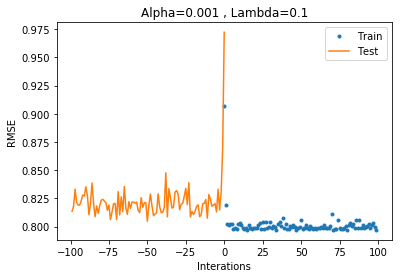

In [22]:
plt.plot(list( results.index),results.iloc[:,0], label="Train")
plt.plot(list(-results.index),results.iloc[:,1], label="Test")
plt.xlabel('Interations')
plt.ylabel('RMSE')
plt.title("Alpha=0.001 , Lambda=0.1")
plt.legend()
plt.show()

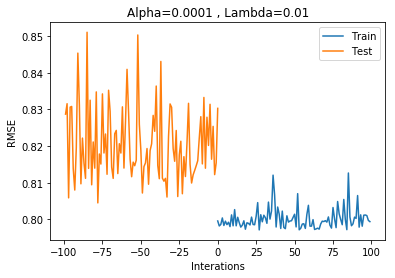

In [23]:
plt.plot(list( results.index),results.iloc[:,2], label="Train")
plt.plot(list(-results.index),results.iloc[:,3], label="Test")
plt.xlabel('Interations')
plt.ylabel('RMSE')
plt.title("Alpha=0.0001 , Lambda=0.01")
plt.legend()
plt.show()

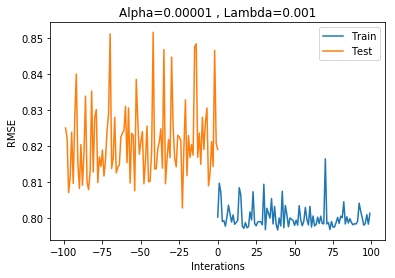

In [458]:
plt.plot(list( results.index),results.iloc[:,4], label="Train")
plt.plot(list(-results.index),results.iloc[:,5], label="Test")
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title("Alpha=0.00001 , Lambda=0.001")
plt.legend()
plt.show()

# Exercise 2

# Hyperparameter Optimization

In [459]:
import pandas as pd
import numpy as np
import random as random
import matplotlib.pyplot as plt

In [460]:
data = pd.read_csv("C:/MLL4/winequality-red.csv", sep=";")
data = (data - data.mean()) /data.std()

In [461]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594,-0.787576
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594,-0.787576
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594,0.450707
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576


The k-fold cross validation method (also called just cross validation) is a resampling method that provides a more accurate estimate of algorithm performance.

It does this by first splitting the data into k groups. The algorithm is then trained and evaluated k times and the performance summarized by taking the mean performance score. Each group of data is called a fold, hence the name k-fold cross-validation.

It works by first training the algorithm on the k-1 groups of the data and evaluating it on the kth hold-out group as the test set. This is repeated so that each of the k groups is given an opportunity to be held out and used as the test set.

As such, the value of k should be divisible by the number of rows in your training dataset, to ensure each of the k groups has the same number of rows.

You should choose a value for k that splits the data into groups with enough rows that each group is still representative of the original dataset. A good default to use is k=3 for a small dataset or k=10 for a larger dataset. A quick way to check if the fold sizes are representative is to calculate summary statistics such as mean and standard deviation and see how much the values differ from the same statistics on the whole dataset.

We can reuse what we learned in the previous section in creating a train and test split here in implementing k-fold cross validation.

https://machinelearningmastery.com/implement-resampling-methods-scratch-python/

In [473]:
def k_fold_cross_validation(dataset, folds):
    dataset_split = list()
    data_copy = dataset.copy()
    data_copy=np.array(data_copy)
    np.random.shuffle(data_copy)
    fold_size = int(len(dataset) / folds)
    for i in range(folds):
        fold = list()
        for j in range(i*fold_size,(i+1)*fold_size):
            fold.append(data_copy[j,:])
        dataset_split.append(fold)
    return dataset_split

In [474]:
data_split = k_fold_cross_validation(data,5)

In [475]:
#data_split=np.array(data_split)

In [476]:
data_split

[[array([ 2.68816991, -1.16062133,  1.94569906,  0.04340257,  0.11756981,
         -0.08364328,  0.01617882,  1.51182615, -1.6912959 , -0.28405227,
          0.16610891, -0.78757625]),
  array([-0.06871376,  4.47995539, -1.3910371 , -0.59492787, -0.13739509,
         -1.2308536 , -1.04780217, -0.18368725,  1.41778494, -0.99198772,
          0.44762259, -0.78757625]),
  array([-0.47075929, -0.15537004,  0.45700139,  2.52579873, -0.34986584,
          0.10755844,  1.68814895,  0.55809987,  0.25187962,  0.83684552,
          0.07227102, -0.78757625]),
  array([ 0.2758967 ,  0.12386643, -1.18569949, -0.24029985,  0.66999375,
         -0.17924414,  0.28977394, -0.28965683, -0.65493562, -0.34304689,
          0.44762259,  0.45070735]),
  array([ 0.16102655,  0.65441573, -0.10767704, -0.38215106, -0.09490094,
         -0.7528493 , -0.56141086,  0.74354664, -0.201528  , -0.34304689,
         -0.39691844,  0.45070735]),
  array([-0.52819437,  0.12386643, -0.41568345, -0.52400227, -0.11614802,
 

we saw that we have partitioned our data in 5 chunks
,Now we will split the chunks as train and test dataset

In [484]:
data_train = data_split[1]
data_train= data_split[4]


In [486]:
#target is quality, then we will seperate it(quality is 12th columns)
data_train_X = data_train[11]
data_train_Y = data_train[0:10]

In [487]:
data_train_Y = np.array(data_train_Y).flatten()

In [488]:
data_test_Y = np.array(data_test_Y).flatten()

In [492]:
def mini_BGD(x_train, y_train, x_test, y_test, beta, alpha, Lambda ,BatchSize, numIterations):
    Train_loss = []
    Train_RMSE = []
    Test_loss = []
    Test_RMSE = []
    for i in range(0, numIterations):
        for j in range(np.int(np.ceil(len(x_train)/BatchSize))):
            data_range=range(j*BatchSize,min((j+1)*BatchSize,len(x_train)))
            
            y_hat = np.dot(x_train[data_range], beta)
            loss = y_train[data_range] - y_hat
            cost = np.sum(loss ** 2)
            gradient = -2*np.dot(x_train[data_range,:].transpose(), loss)
            beta[0]= beta[0]  - alpha * gradient[0]
            for k in range(1,len(beta)):
                beta[k] = beta[k]*(1-2*alpha*Lambda) - alpha * gradient[k]    
        y_hat = np.dot(x_train, beta); loss = y_train - y_hat; cost = np.sum(loss ** 2)
        Train_loss.append(np.sum(abs(loss))) 
        Train_RMSE.append((cost/len(x_train))**0.5)
        
        y_hat = np.dot(x_test, beta)
        loss = y_test - y_hat
        cost = np.sum(loss ** 2)

        Test_loss.append(np.sum(abs(loss))) 
        Test_RMSE.append((cost/len(x_test))**0.5)
        
    return beta, Train_RMSE, Test_RMSE

In [493]:
#parameters
numIterations = 100
BatchSize = 50
Lambda = [0.1, 0.01, 0.001]
alpha= [0.001, 0.0001, 0.00001]
beta = np.ones(len(data_train_X))
results = pd.DataFrame()

In [494]:
#Apply Mini_BGD
for i in range(len(alpha)):
    for j in range(len(Lambda)):
        alpha_current = alpha[i]
        Lambda_current = Lambda[j]
        results_int = mini_BGD(data_train_X,data_train_Y, data_test_X, data_test_Y, beta,alpha_current,Lambda_current ,BatchSize, numIterations)

IndexError: too many indices for array

# Exercise 3

# Newton Method for solving Logistic Regression 

http://thelaziestprogrammer.com/sharrington/math-of-machine-learning/solving-logreg-newtons-method

In [375]:
import pandas as pd
import numpy as np
import random as random
import matplotlib.pyplot as plt

In [377]:
data = pd.read_csv("C:/MLL4/winequality-red.csv", sep=";")
data = (data - data.mean()) /data.std()

In [430]:
data_train = data.sample(frac=0.8, random_state=1)
data_test = data.drop(data_train.index)
data_train.reset_index(drop=True,inplace=True)
data_test.reset_index(drop=True,inplace=True)
data_train_X = data_train.drop(["quality"], axis=1)
data_train_Y = data_train[["quality"]]
data_test_X = data_test.drop(["quality"], axis=1)
data_test_Y = data_test[["quality"]]
data_train_X = data_train_X.as_matrix()
data_train_X = np.hstack((np.ones((len(data_train_X),1)),data_train_X))
data_train_Y = data_train_Y.as_matrix()
data_train_Y = np.array(data_train_Y).flatten()
data_test_X = data_test_X.as_matrix()
data_test_X = np.hstack((np.ones((len(data_test_X),1)),data_test_X))
data_test_Y = data_test_Y.as_matrix()
data_test_Y = np.array(data_test_Y).flatten()

We start off by defining our hypothesis function, which is the sigmoid function.

In [395]:
def sigmoid(x, teta1, teta2):                                                        
    z = (teta1*x + teta2).astype("float_")                                              
    return 1.0 / (1.0 + np.exp(-z))  

Then we define ℓ(θ), our log-likelihood function:

In [396]:
def log_likelihood(x, y, teta1, teta2):                                                                
    sigmoid_probs = sigmoid(x, teta1, teta2)                                        
    return np.sum(y * np.log(sigmoid_probs)
                  + (1 - y) * np.log(1 - sigmoid_probs))    

Finally, we implement the gradient and the hessian of our log-likelihood.

In [397]:
def gradient(x, y, teta1, teta2):                                                         
    sigmoid_probs = sigmoid(x, teta1, teta2)                                        
    return np.array([[np.sum((y - sigmoid_probs) * x),                          
                     np.sum((y - sigmoid_probs) * 1)]])                         

def hessian(x, y, teta1, teta2):                                                          
    sigmoid_probs = sigmoid(x, teta1, teta2)                                        
    d1 = np.sum((sigmoid_probs * (1 - sigmoid_probs)) * x * x)                  
    d2 = np.sum((sigmoid_probs * (1 - sigmoid_probs)) * x * 1)                  
    d3 = np.sum((sigmoid_probs * (1 - sigmoid_probs)) * 1 * 1)                  
    H = np.array([[d1, d2],[d2, d3]])                                           
    return H

In [434]:
def newtons_method(x, y):                                                             
    # Initialize log_likelihood & parameters                                                                   
    teta1 = 15.1                                                                     
    teta2 = -.4 # The intercept term                                                                 
    Deltal = np.Infinity                                                                
    l = log_likelihood(x, y, teta1, teta2)                                                                 
    # Convergence Conditions                                                        
    alpha = 0.000001                                                                 
    NumIterations = 100                                                           
    i = 0                                                                           
    while abs(Deltal) > alpha and i < NumIterations:                                       
        i += 1                                                                      
        g = gradient(x, y, teta1, teta2)                                                      
        hess = hessian(x, y, teta1, teta2)                                                 
        H_inv = np.linalg.inv(hess)                                                 
        # @ is syntactic sugar for np.dot(H_inv, g.T)¹
        Delta = H_inv @ g.T                                                             
        Deltateta_1 = Delta[0][0]                                                              
        Deltateta_2 = Delta[1][0]                                                              
                                                                                    
        # Perform our update step                                                    
        Teta1 += Deltateta_1                                                                 
        Teta2 += Deltateta2                                                                 
                                                                                    
        Update the log-likelihood at each iteration                                     
        l_new = log_likelihood(x, y, Θ_1, Θ_2)                                                      
        Δl = l - l_new                                                           
        l = l_new                                                                
    return np.array([Teta1, Teta2])     

In [435]:
def func(x_train, y_train, x_test, y_test, beta, alpha, Lambda ,BatchSize, numIterations):
    Train_loss = []
    Train_RMSE = []
    Test_loss = []
    Test_RMSE = []
    for i in range(0, numIterations):
        for j in range(np.int(np.ceil(len(x_train)/BatchSize))):
            data_range=range(j*BatchSize,min((j+1)*BatchSize,len(x_train)))
            beta = newtons_method(x_test[data_renge],y_test)   
        y_hat = np.dot(x_train, beta); loss = y_train - y_hat; cost = np.sum(loss ** 2)
        Train_loss.append(np.sum(abs(loss))) 
        Train_RMSE.append((cost/len(x_train))**0.5)
        
        y_hat = np.dot(x_test, beta)
        loss = y_test - y_hat
        cost = np.sum(loss ** 2)

        Test_loss.append(np.sum(abs(loss))) 
        Test_RMSE.append((cost/len(x_test))**0.5)
        
    return beta, Train_RMSE, Test_RMSE

In [437]:
#Result = newtons_method(data_train_X,data_train_Y)   